In [34]:
import pandas as pd
import numpy as np
books_file_path = "./Datasets/books.csv"
data = pd.read_csv("./Datasets/books.csv", index_col="index")
data

,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...
4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,Red Rising,fantasy,"""I live for the dream that my children will be..."


<Axes: >

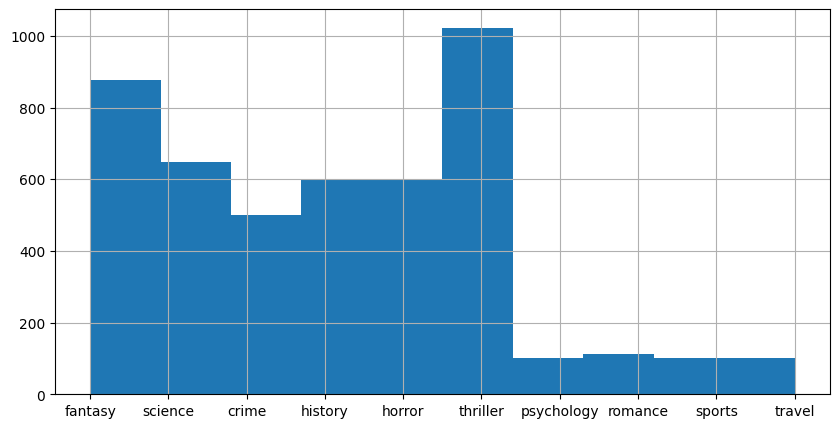

In [3]:
data.genre.hist(figsize=(10,5))

In [35]:
def sampling(books_file_path, max_samples_per_class=500):

    # Load the dataset
    data = pd.read_csv(books_file_path, index_col="index")
    
    # Determine the number of samples for each genre
    samples_per_genre = data['genre'].value_counts()
    
    # Initialize an empty dataframe to store the reduced dataset
    reduced_data = pd.DataFrame()
    
    # Iterate through each genre and reduce the number of samples if necessary
    for genre, count in samples_per_genre.items():

        if count > max_samples_per_class:
            # If the genre has more samples than the limit, randomly select `max_samples_per_class` samples
            reduced_samples = data[data['genre'] == genre].sample(n=max_samples_per_class, random_state=42)
        else:
            # If the genre has less than or equal to the limit, keep all samples
            reduced_samples = data[data['genre'] == genre]
        
        # Append the reduced samples for this genre to the reduced_data dataframe
        reduced_data = pd.concat([reduced_data, reduced_samples])
    
    # Save the reduced dataset to a new file or overwrite the old one
    reduced_books_file_path = r"./Datasets/reduced_books.csv"
    reduced_data.to_csv(reduced_books_file_path)
    
    return reduced_books_file_path, reduced_data

data = pd.read_csv("./Datasets/books.csv", index_col="index")

reduced_books_file_path, reduced_data= sampling(books_file_path, max_samples_per_class=500)

reduced_data = pd.read_csv(reduced_books_file_path, index_col="index")
reduced_data

,title,genre,summary
index,,,
3683,Jurassic Park,thriller,An astonishing technique for recovering and cl...
2857,Empire of Lies,thriller,The book is a thriller in which the protagoni...
2944,The Gun Seller,thriller,The Gun Seller tells the story of retired Arm...
2531,Cemetery Dance,thriller,Pendergast returns to NYC in New York Times b...
3776,Jar of Hearts,thriller,This is the story of three best friends: one w...
...,...,...,...
4276,World Travel: An Irreverent Guide,travel,A guide to some of the world’s most fascinatin...
4277,"Four Seasons in Rome: On Twins, Insomnia, and ...",travel,From the award-winning author of The Shell Col...
4278,Rick Steves' Europe Through the Back Door,travel,You can count on Rick Steves to tell you what ...


In [29]:
num_labels = len(data.genre.unique())
print("num labels: ", num_labels)
genre2id = {genre: i for i, genre in enumerate(data.genre.unique())}
id2genre = {i: genre for i, genre in enumerate(data.genre.unique())}

num labels:  10


<Axes: >

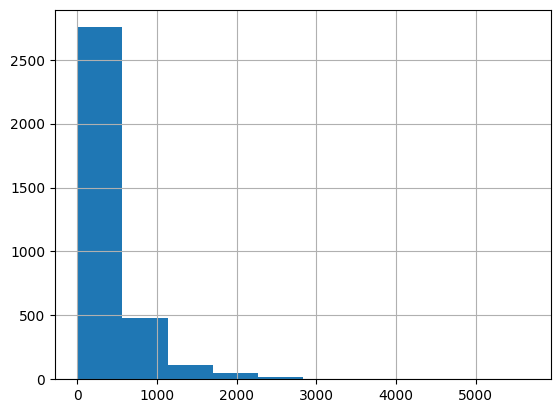

In [31]:
# summary len 
reduced_data.summary.str.split().apply(len).hist()

In [32]:
data["genre_id"] = data.genre.apply(lambda a: genre2id[a])
data["title_and_summary"] = data.apply(lambda a: a["title"] + "." + a["summary"], axis=1)
data["title_and_summary"]
reduced_data['genre'].value_counts()

genre
thriller      500
fantasy       500
science       500
history       500
horror        500
crime         500
romance       111
psychology    100
sports        100
travel        100
Name: count, dtype: int64

In [25]:
data.head()

,title,genre,summary,genre_id,title_and_summary
index,,,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,0,Drowned Wednesday. Drowned Wednesday is the fi...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",0,"The Lost Hero. As the book opens, Jason awaken..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,0,The Eyes of the Overworld. Cugel is easily per...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,0,Magic's Promise. The book opens with Herald-Ma...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,0,Taran Wanderer. Taran and Gurgi have returned ...


In [33]:
# If there's a GPU available...
import torch
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3080 Laptop GPU


In [9]:
from transformers import RobertaConfig
from transformers import AdamW, BertConfig
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Initializing a RoBERTa configuration
configuration = RobertaConfig()
configuration.num_labels = num_labels

tokenizer = AutoTokenizer.from_pretrained("roberta-base", max_length = 512)

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = num_labels, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    #output_attentions = False, # Whether the model returns attentions weights.
    #output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.

model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [10]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in data.title_and_summary.values:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 500,           # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(data.genre_id.values)

In [11]:
# Print sentence 0, now as a list of IDs.
print('Original: ', data.title_and_summary[0])
print('Token IDs:', input_ids[0])

Original:  Drowned Wednesday. Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday's Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew's treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by w

In [12]:
from torch.utils.data import TensorDataset, random_split

# Assuming dataset is already created
dataset = TensorDataset(input_ids, attention_masks, labels)

# Define split sizes
train_size = int(0.8 * len(dataset))
test_size = int(0.1 * len(dataset))
val_size = len(dataset) - train_size - test_size

# Split the dataset
train_dataset, remaining_dataset = random_split(dataset, [train_size, len(dataset) - train_size])
test_dataset, val_dataset = random_split(remaining_dataset, [test_size, val_size])

print('{:>5,} training samples'.format(len(train_dataset)))
print('{:>5,} validation samples'.format(len(val_dataset)))
print('{:>5,} test samples'.format(len(test_dataset)))

3,725 training samples
  467 validation samples
  465 test samples


In [13]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

valid_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

test_dataloader = DataLoader(
            test_dataset,  # The test samples.
            sampler=SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size=batch_size  # The same batch size as for training/validation.
        )

In [14]:
from transformers import get_linear_schedule_with_warmup
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
epochs = 3
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

c:\Users\clara\anaconda3\envs\cuda_env\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [33]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [34]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [22]:
import random
from ignite.metrics import Precision, Recall

precision = Precision(average=False)

def train_model(model, train_dataloader, validation_dataloader):

    # Set the seed value all over the place to make this reproducible.
    seed_val = 42

    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    batch_loss = 0

    for epoch_i in range(0, epochs):


        # Training

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):


            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            model.zero_grad()        

            res = model(b_input_ids, 
                                 token_type_ids=None, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels)
            loss = res['loss']
            logits = res['logits']

            total_train_loss += loss.item()
            batch_loss += loss.item()

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))


        # Validation

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)


            with torch.no_grad():        
                res = model(b_input_ids, 
                                       token_type_ids=None, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels)
            loss = res['loss']
            logits = res['logits']

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            total_eval_accuracy += flat_accuracy(logits, label_ids)



        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))


        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")
    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
      # Save the model weights
    model_save_path = 'A/models/roberta.bin'
    torch.save(model.state_dict(), model_save_path)
    
train_model(model, train_dataloader, valid_dataloader)


======== Epoch 1 / 3 ========
Training...

  Average training loss: 1.26
  Training epcoh took: 0:27:09

Running Validation...
  Accuracy: 0.71
  Validation Loss: 0.91
  Validation took: 0:00:55

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.65
  Training epcoh took: 0:27:01

Running Validation...
  Accuracy: 0.74
  Validation Loss: 0.79
  Validation took: 0:00:55

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.47
  Training epcoh took: 0:26:44

Running Validation...
  Accuracy: 0.75
  Validation Loss: 0.78
  Validation took: 0:00:54

Training complete!
Total training took 1:23:39 (h:mm:ss)


In [40]:
# Load the saved weights
model_save_path = 'A/models/roberta.bin'
model.load_state_dict(torch.load(model_save_path))

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# train predictions

predictions = [] # initializin 2 empy lists to store model predictions and labels
labels = []
for batch in train_dataloader:   # loop iterating over each batch of data 
    b_input_ids = batch[0].to(device) # These lines extract input IDs, attention masks, 
    #and labels from the current batch and move them to the GPU (if available) for faster computation.
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)


    with torch.no_grad():        
        res = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = res['logits']
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        labels.append(label_ids)
        predictions.append(logits)
        #print(logits)
            
flat_predictions = np.concatenate(predictions, axis=0)
flat_labels = np.concatenate(labels, axis=0).flatten()
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_labels.shape, flat_predictions.shape

((3725,), (3725,))

In [41]:
from sklearn.metrics import classification_report

print("Train data classification report")
target_names = data.genre.unique()
print(classification_report(flat_labels, flat_predictions, target_names=target_names))

Train data classification report
              precision    recall  f1-score   support

     fantasy       0.90      0.88      0.89       710
     science       0.87      0.89      0.88       514
       crime       0.88      0.84      0.86       391
     history       0.89      0.95      0.92       478
      horror       0.80      0.78      0.79       471
    thriller       0.85      0.87      0.86       817
  psychology       0.87      0.95      0.91        83
     romance       0.85      0.74      0.79        96
      sports       0.95      0.95      0.95        80
      travel       0.99      0.91      0.94        85

    accuracy                           0.87      3725
   macro avg       0.88      0.87      0.88      3725
weighted avg       0.87      0.87      0.87      3725



Train confusion matrix


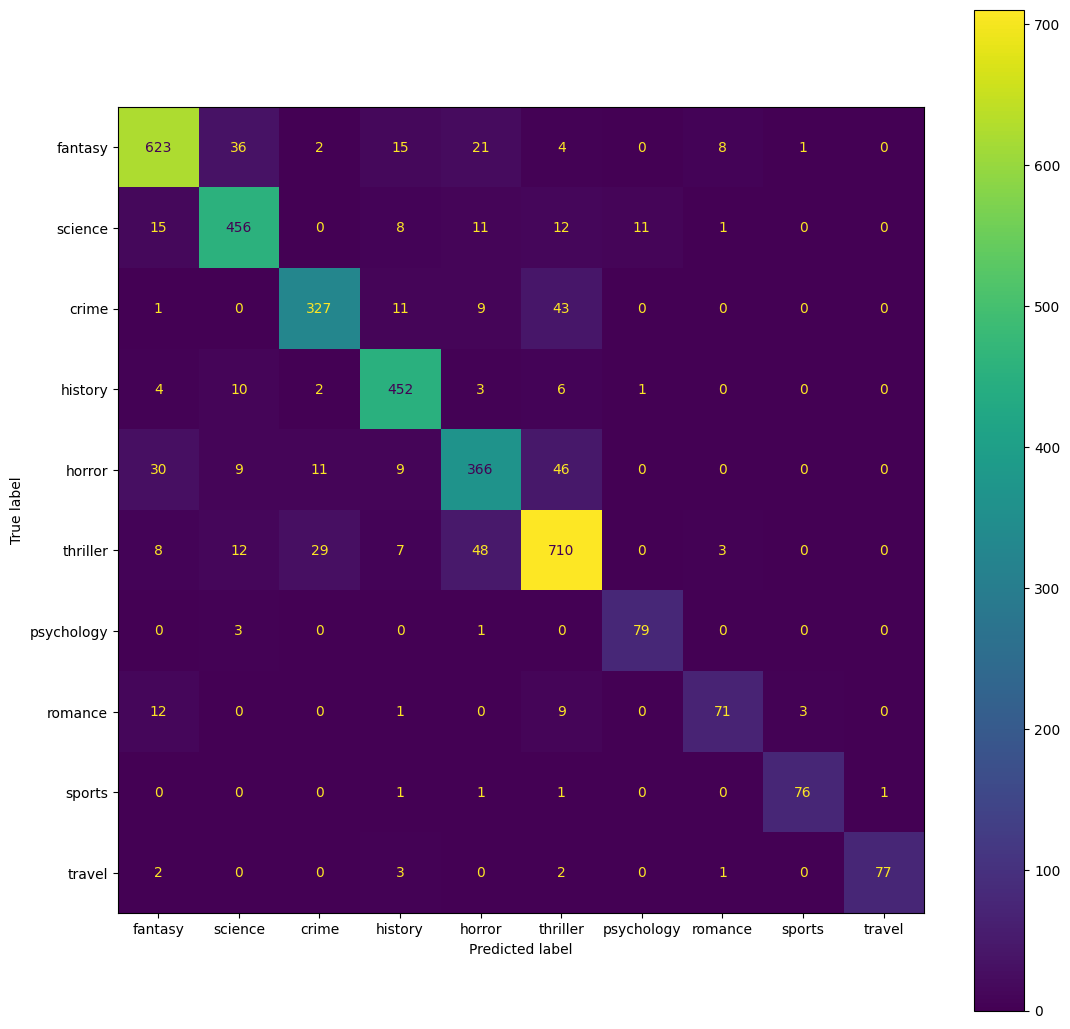

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Train confusion matrix")

plt.figure(figsize=(13,13))
ax= plt.subplot()
cm = confusion_matrix(flat_labels, flat_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(ax=ax)

In [43]:
# valid predictions

predictions = []
labels = []
for batch in valid_dataloader:

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)


    with torch.no_grad():        
        res = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = res['logits']
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        labels.append(label_ids)
        predictions.append(logits)
        #print(logits)
            
flat_predictions = np.concatenate(predictions, axis=0)
flat_labels = np.concatenate(labels, axis=0).flatten()

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_labels.shape, flat_predictions.shape

((467,), (467,))

Valid confusion matrix


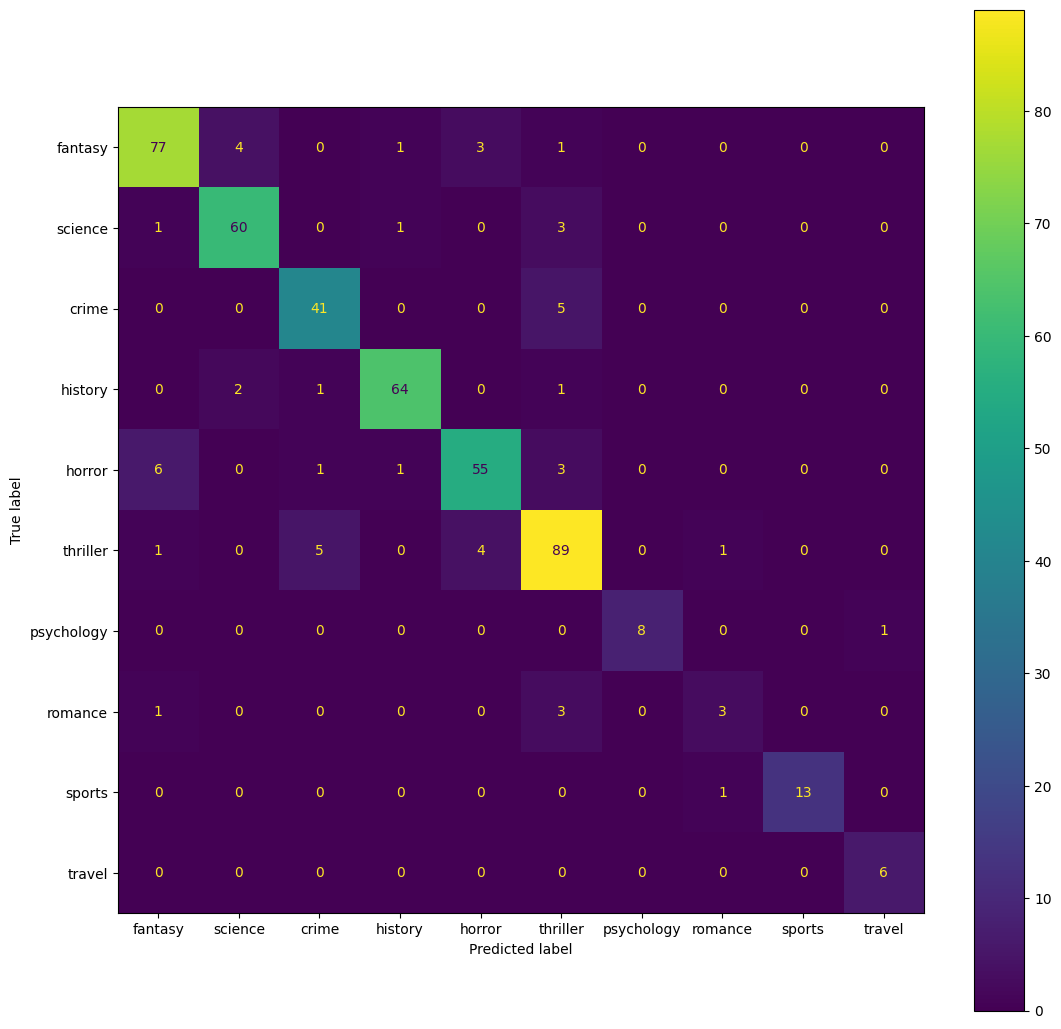

In [44]:
print("Valid confusion matrix")

plt.figure(figsize=(13,13))
ax = plt.subplot()
cm = confusion_matrix(flat_labels, flat_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(ax=ax)

In [45]:
# valid predictions

predictions = []
labels = []
for batch in test_dataloader:

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)


    with torch.no_grad():        
        res = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = res['logits']
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        labels.append(label_ids)
        predictions.append(logits)
        #print(logits)
            
flat_predictions = np.concatenate(predictions, axis=0)
flat_labels = np.concatenate(labels, axis=0).flatten()

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_labels.shape, flat_predictions.shape

((465,), (465,))

Test confusion matrix


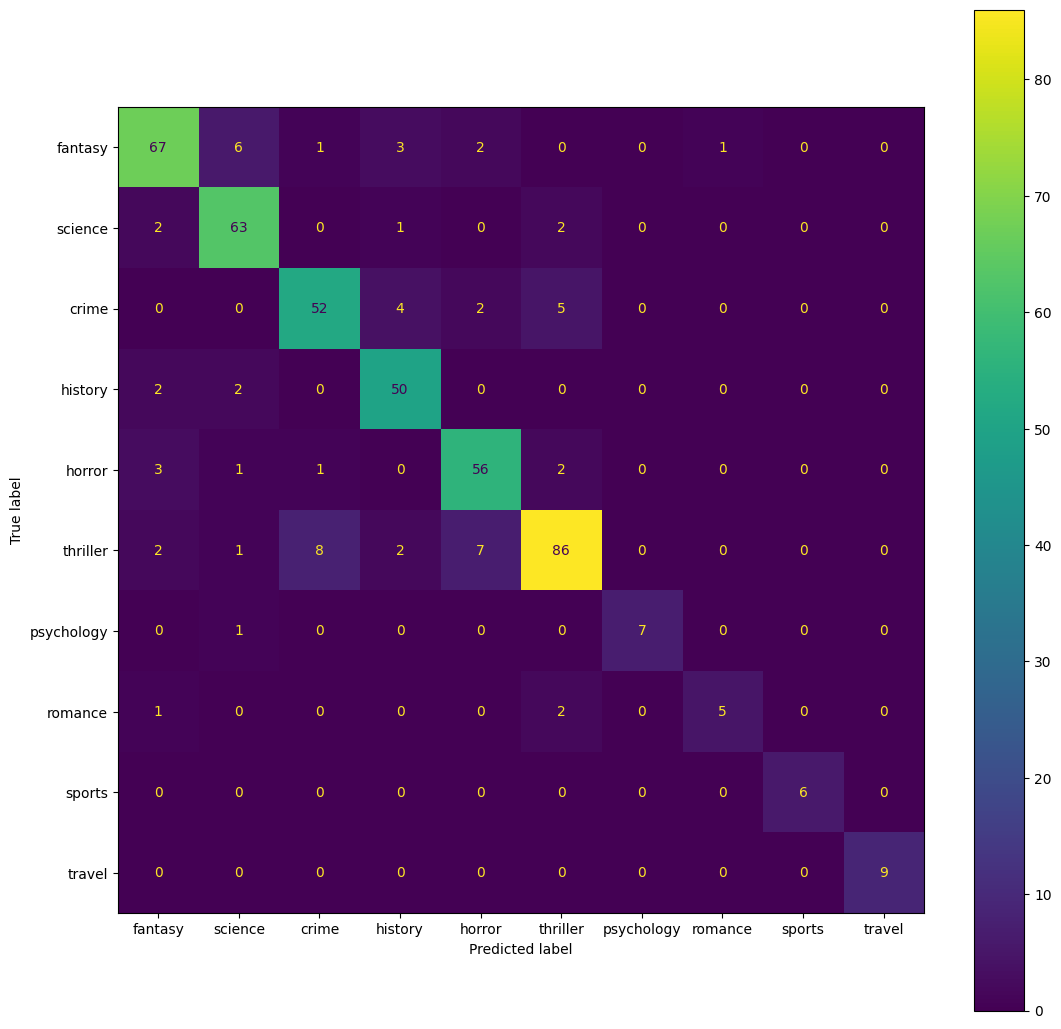

In [46]:
print("Test confusion matrix")

plt.figure(figsize=(13,13))
ax = plt.subplot()
cm = confusion_matrix(flat_labels, flat_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(ax=ax)